# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("./data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe

In [4]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: AVG_MATH_8_SCORE

How many years of data are logged in our dataset? 

In [5]:
df['YEAR'].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [6]:
MI = df.loc[df['STATE']=='MICHIGAN',:].dropna(subset=['AVG_MATH_8_SCORE'])
OH = df.loc[df['STATE']=='OHIO',:].dropna(subset=['AVG_MATH_8_SCORE'])


In [7]:
MI_Y_score = MI.loc[:,["YEAR","AVG_MATH_8_SCORE"]]
OH_Y_score = OH.loc[:,["YEAR","AVG_MATH_8_SCORE"]]

In [8]:
MI_Y_score = MI_Y_score.rename(columns = {"AVG_MATH_8_SCORE": "MI_AVG_MATH_8_SCORE"})
OH_Y_score = OH_Y_score.rename(columns = {"AVG_MATH_8_SCORE": "OH_AVG_MATH_8_SCORE"})

In [9]:
combined = pd.merge(MI_Y_score, OH_Y_score, on='YEAR', how='inner')
combined

,YEAR,MI_AVG_MATH_8_SCORE,OH_AVG_MATH_8_SCORE
0,1992,267.0,268.0
1,2000,277.0,281.0
2,2003,276.0,282.0
3,2005,277.0,283.0
4,2007,277.0,285.0
5,2009,278.0,286.0
6,2011,280.0,289.0
7,2013,280.0,290.0
8,2015,278.0,285.0
9,1990,264.0,264.0


Ohio consistently has higher average 8th grade math score across all years

Find the average for your outcome score across all states in 2019

In [10]:
df.loc[df["YEAR"] == 2019,["AVG_MATH_8_SCORE"]].mean()

AVG_MATH_8_SCORE    281.264151
dtype: float64

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [11]:
df.groupby("STATE")["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [12]:
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df['LOCAL_REVENUE_PER_STUDENT'] = df['LOCAL_REVENUE'] / df['ENROLL_ALL']

Feature engineering justification: I believe total and instruction expenditure is the most relevant expenditure for education but since it is total amount without accounting for each state's student population size, they don't really reflect how much resource a state devotes to education and needs to be transformed to per student expenditure. Also since school budget mostly come from local government revenue through property tax, local revenue per student is a logical one to examine. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:title={'center':'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

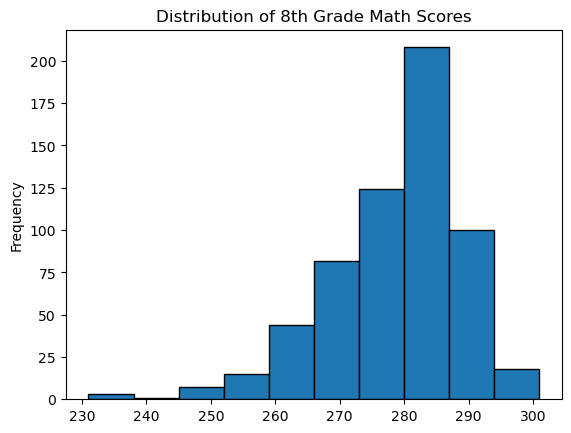

In [13]:
# note - this test is scored out of 500 according to the NAEP website
df.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")

In [14]:
score = df.groupby('YEAR')["AVG_MATH_8_SCORE"].mean().dropna()

In [15]:
score

YEAR
1990    263.000000
1992    266.325581
1996    270.000000
2000    271.404762
2003    276.943396
2005    277.867925
2007    280.773585
2009    282.509434
2011    283.584906
2013    284.113208
2015    281.905660
2017    282.113208
2019    281.264151
Name: AVG_MATH_8_SCORE, dtype: float64

**<CAPTION FOR VIZ 1>**

Text(0.5, 1.0, '8th Grade Math Score Over Time')

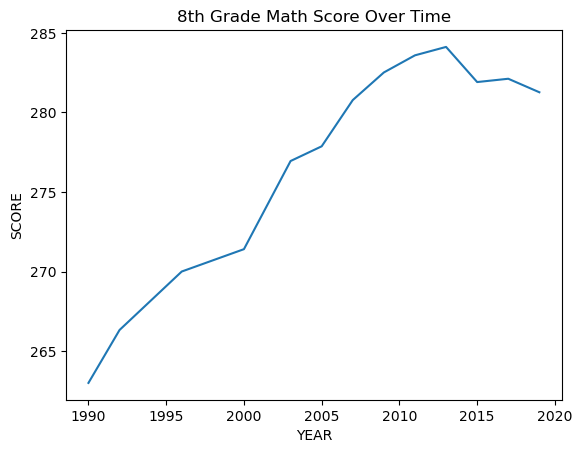

In [16]:
score.plot()
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over Time')

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

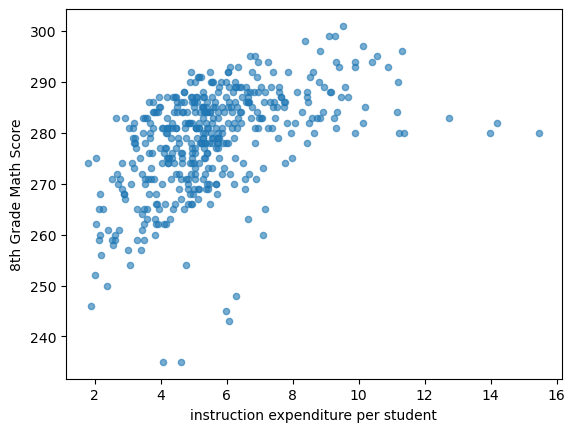

In [17]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('instruction expenditure per student')
plt.ylabel('8th Grade Math Score')

Text(0, 0.5, '8th Grade Math Score')

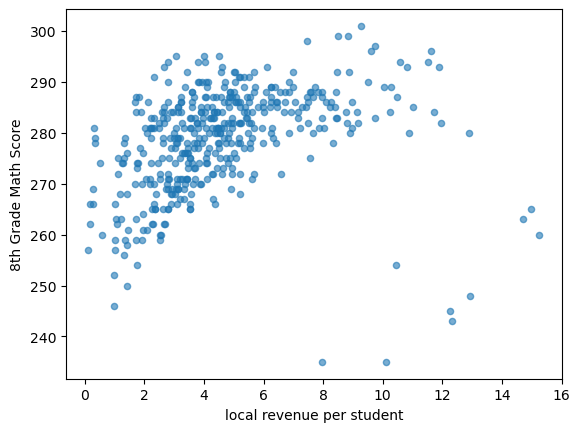

In [18]:
df.plot.scatter(x='LOCAL_REVENUE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('local revenue per student')
plt.ylabel('8th Grade Math Score')

Text(0, 0.5, '8th Grade Math Score')

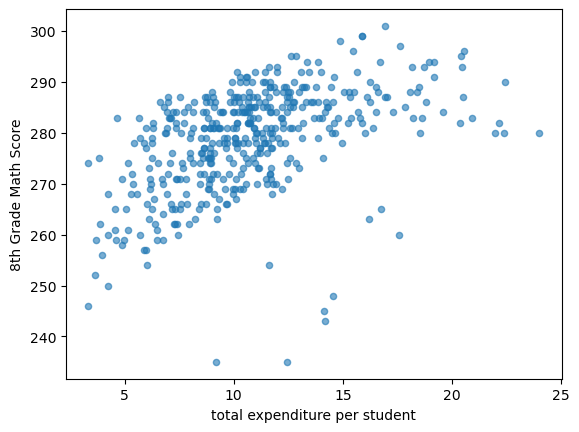

In [19]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('total expenditure per student')
plt.ylabel('8th Grade Math Score')

Text(0, 0.5, '8th Grade Math Score')

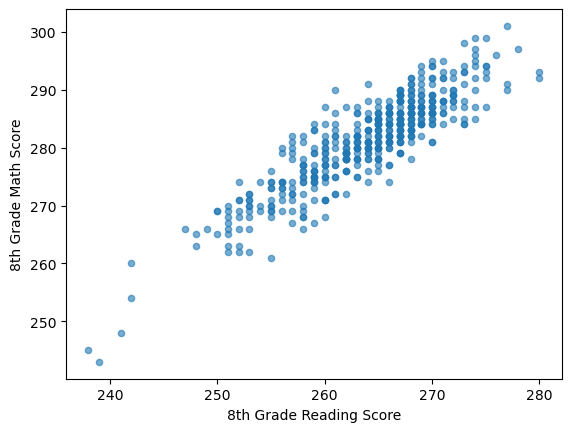

In [20]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Reading Score')
plt.ylabel('8th Grade Math Score')

Text(0, 0.5, '8th Grade Math Score')

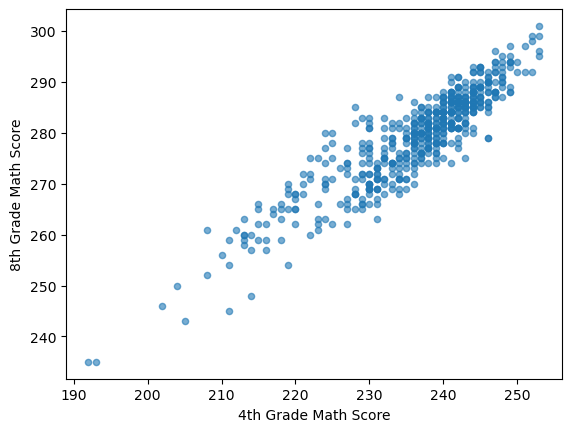

In [21]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('8th Grade Math Score')

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [22]:
# since instruction_expenditure_per_student look very similar to total_expenditure_per_student in plot and avg_math_8_score decline after 
# local_revenue_per_student pass $12 and there are distinct two groups of data points in the plot. I decide to drop these two predictors
X = df[['TOTAL_EXPENDITURE_PER_STUDENT','AVG_READING_8_SCORE','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']


In [23]:
# We also need to make sure there is no NaN in y
# This time, we will fill the NaN with the median of y 
# We prefer median to mean because EDA reveals that the response variable is left-skewed. Therefore, the mean may not represent the data very well
y.fillna(y.mean(), inplace=True)

In [24]:
# test_train_split randomly splits the data into two parts -- 
# one for training the model (it uses this data to learn patterns)
# and one for testing the model (to make sure it performs well on data it hasn't seen before)
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [26]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [27]:
# create your model her
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [30]:
# You can see the intercepts and coefficients the model generates
print(model.intercept_)
print(model.coef_)

-30.100890803517302
[0.02870815 0.51441675 0.73378353]


In [31]:
# R^2 value describes how well a linear model fits the data
# It ranges between 0 and 1
# There are many caveats to R^2 but it is a good starting point
model.score(X_test, y_test)

0.9220953604878447

In [32]:
# mean error
np.mean(model.predict(X_test)-y_test)

0.5844232994566638

In [33]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

1.7739113320055233

In [34]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

2.2442306056694754

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

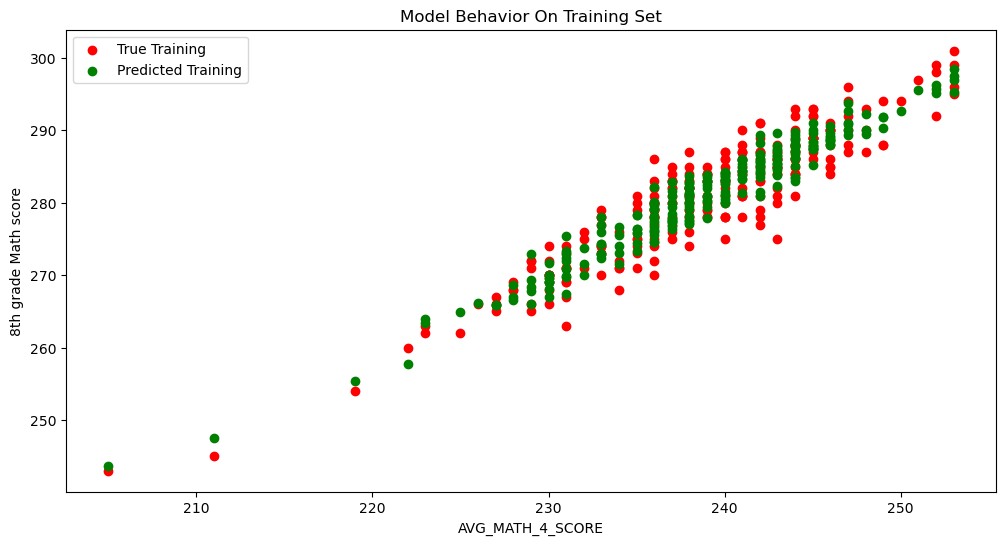

In [35]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('8th grade Math score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

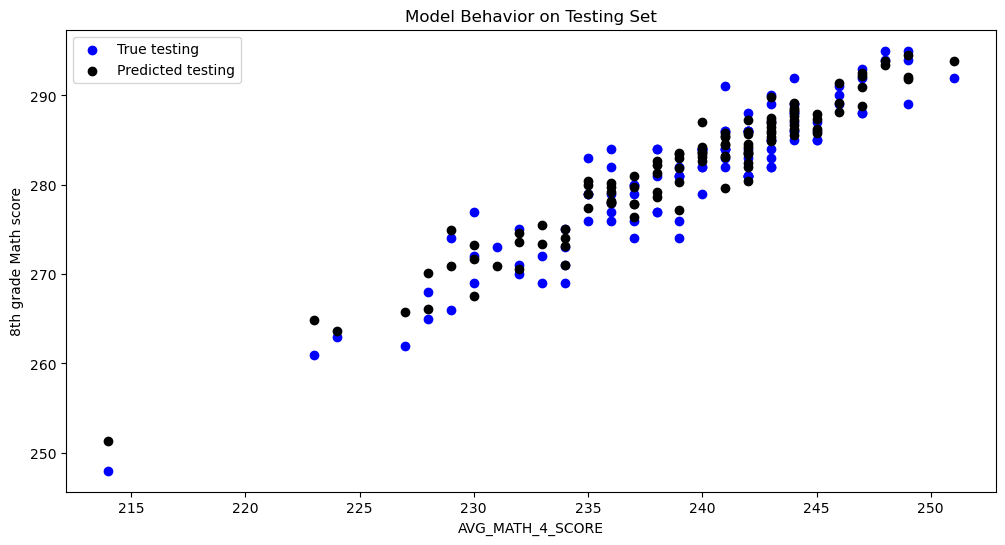

In [36]:
col_name = "AVG_MATH_4_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th grade Math score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Training Set')

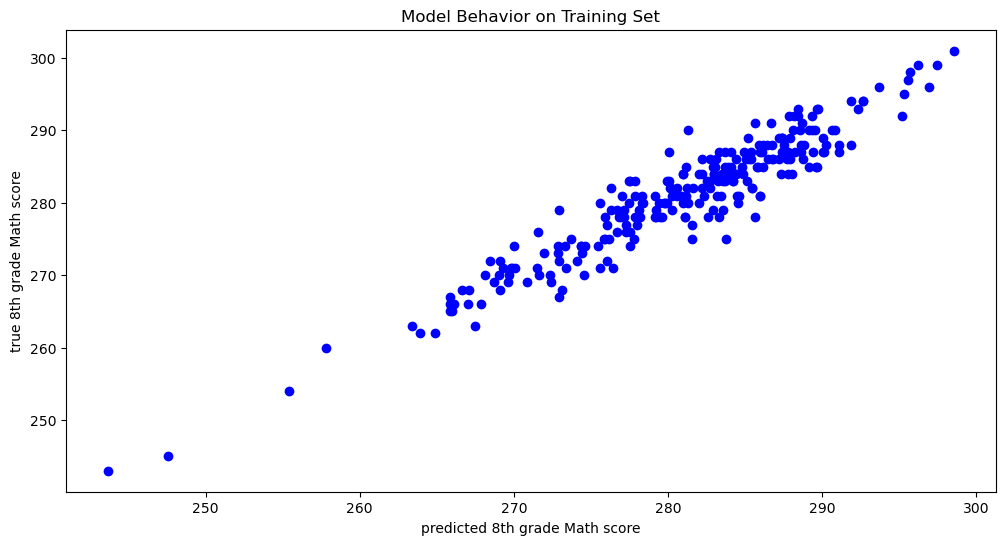

In [37]:
f = plt.figure(figsize=(12,6))
plt.scatter(model.predict(X_train), y_train, color = "blue")
plt.xlabel("predicted 8th grade Math score")
plt.ylabel('true 8th grade Math score')
plt.title("Model Behavior on Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

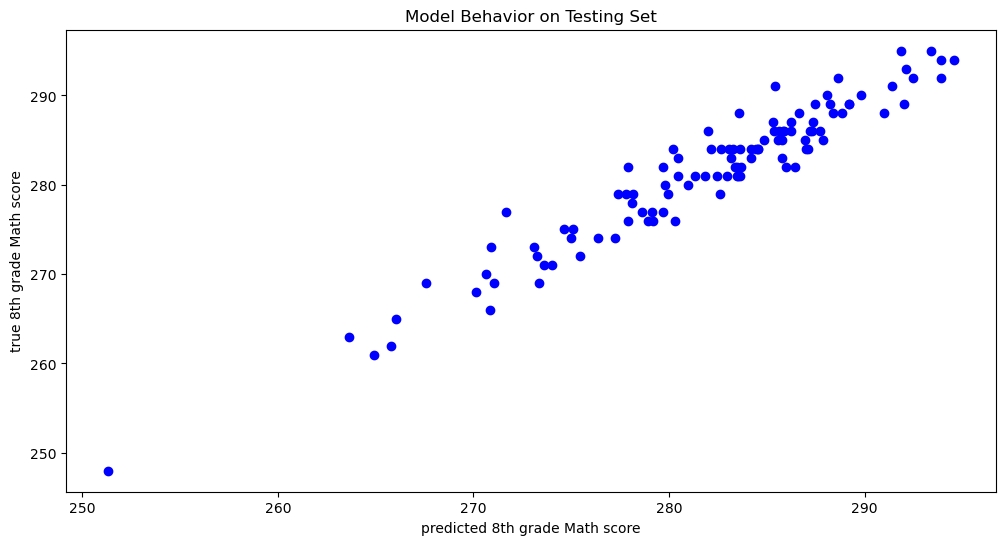

In [38]:
f = plt.figure(figsize=(12,6))
plt.scatter(model.predict(X_test), y_test, color = "blue")
plt.xlabel("predicted 8th grade Math score")
plt.ylabel('true 8th grade Math score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

For both train and test data sets, the model predicted scores and actual score line well in plots and model's R-square is very high at 0.92 and all other performance metrics look good, the three predictors we choose are strong predictors for avg 8th grade math score in a linear model.